# Credit Card Users Cluster Analysis

## Import the relevant libraries

## Load the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.float_format = '{:.2f}'.format

Load data from the csv file: 'CC_General_Dataset.csv'.

In [2]:
df = pd.read_csv('CC_General_Dataset.csv')

## Explore the data

In [3]:
df.describe(include='all')

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8949.00,8950.00,8637.00,8950.00,8950.00
unique,8950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1564.47,0.88,1003.20,592.44,411.07,978.87,0.49,0.20,0.36,0.13,3.25,14.71,4494.45,1733.14,864.21,0.15,11.52
std,NaN,2081.53,0.24,2136.63,1659.89,904.34,2097.16,0.40,0.30,0.40,0.20,6.82,24.86,3638.82,2895.06,2372.45,0.29,1.34
min,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.00,0.00,0.02,0.00,6.00
25%,NaN,128.28,0.89,39.63,0.00,0.00,0.00,0.08,0.00,0.00,0.00,0.00,1.00,1600.00,383.27,169.12,0.00,12.00
50%,NaN,873.38,1.00,361.28,38.00,89.00,0.00,0.50,0.08,0.17,0.00,0.00,7.00,3000.00,856.90,312.34,0.00,12.00
75%,NaN,2054.14,1.00,1110.13,577.40,468.64,1113.82,0.92,0.30,0.75,0.22,4.00,17.00,6500.00,1901.13,825.49,0.14,12.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   float64
 12  PURCHA

In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<AxesSubplot:xlabel='MINIMUM_PAYMENTS'>

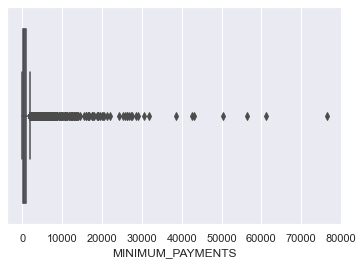

In [6]:

# Box plot
#
sns.boxplot(df.MINIMUM_PAYMENTS)
#


<AxesSubplot:xlabel='MINIMUM_PAYMENTS', ylabel='Density'>

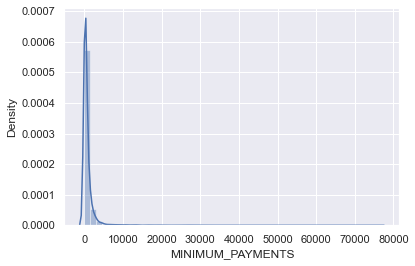

In [7]:
# Distribution plot
#
sns.distplot(df.MINIMUM_PAYMENTS)

In [8]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mode()[0])
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mode()[0])

In [9]:
x = df.copy()

In [10]:
x.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [11]:
del x['CUST_ID']

<AxesSubplot:xlabel='CASH_ADVANCE'>

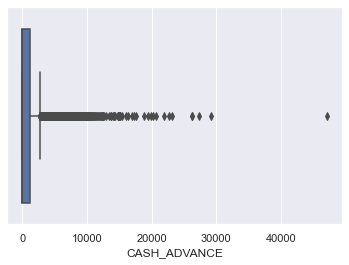

In [12]:
# Distribution plot
#
sns.boxplot(x.CASH_ADVANCE)

In [13]:
print(x.columns)

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')


## Standardize the variables

In [14]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.73198974, -0.24228354, -0.42489974, ..., -0.3001293 ,
        -0.52488029,  0.36067954],
       [ 0.78696211,  0.13728584, -0.46955188, ...,  0.09955326,
         0.22689044,  0.36067954],
       [ 0.44713569,  0.51685522, -0.10766823, ..., -0.0911382 ,
        -0.52488029,  0.36067954],
       ...,
       [-0.74039748, -0.20010917, -0.40196519, ..., -0.32459022,
         0.32940463, -4.12276757],
       [-0.74517307, -0.20010917, -0.46955188, ..., -0.33601302,
         0.32940463, -4.12276757],
       [-0.57257419, -0.87489918,  0.04214581, ..., -0.32207514,
        -0.52488029, -4.12276757]])

## Determining number of clusters based on Elbow Method¶ 

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_red = pca.fit_transform(x_scaled)

In [16]:
wcss = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_red)
    wcss.append(kmeans.inertia_)
# Note: Due to recent changes in the library, the for loop doesn't run if the range starts with 1.

Text(0, 0.5, 'WCSS')

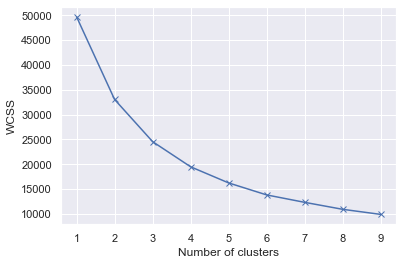

In [17]:
plt.plot(range(1,10),wcss,'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

## Clustering (scaled data) 

In [18]:
kmeans = KMeans(4)
kmeans.fit(X_red)

KMeans(n_clusters=4)

In [19]:
clusters = x.copy()
clusters=kmeans.fit_predict(X_red)

In [20]:
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans.fit_predict(X_red)

In [21]:
clusters_new.sample(15)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_pred
2251,21.31,0.73,3618.19,2804.79,813.40,0.00,1.00,1.00,0.50,0.00,0.00,40.00,15000.00,3570.60,53.63,1.00,12.00,3
427,1648.72,1.00,0.00,0.00,0.00,39.65,0.00,0.00,0.00,0.09,2.00,0.00,1800.00,357.84,631.11,0.00,11.00,1
1066,6.91,0.45,71.40,0.00,71.40,0.00,0.17,0.00,0.08,0.00,0.00,2.00,2000.00,21.55,112.58,0.00,12.00,1
4072,788.62,1.00,2053.78,1094.91,958.87,0.00,0.92,0.25,0.83,0.00,0.00,15.00,2500.00,1875.18,239.17,0.00,12.00,0
370,426.37,1.00,5749.96,5439.96,310.00,0.00,1.00,1.00,0.25,0.00,0.00,50.00,12000.00,5711.54,202.73,0.83,12.00,3
4490,3764.89,1.00,898.43,479.00,419.43,2094.09,0.50,0.08,0.42,0.33,6.00,22.00,4500.00,1067.44,1116.03,0.00,12.00,1
8456,1093.52,1.00,577.12,0.00,577.12,0.00,0.92,0.00,0.83,0.00,0.00,14.00,1050.00,854.41,1405.77,0.00,12.00,0
1643,1647.93,1.00,0.00,0.00,0.00,93.69,0.00,0.00,0.00,0.33,4.00,0.00,1800.00,390.20,717.31,0.00,12.00,1
6112,3506.49,1.00,0.00,0.00,0.00,4467.38,0.00,0.00,0.00,1.00,11.00,0.00,5000.00,286.71,628.48,0.00,6.00,2
8746,2856.47,1.00,1200.00,1200.00,0.00,1710.32,0.09,0.09,0.00,0.09,3.00,1.00,3000.00,0.00,171.75,0.00,11.00,1


## Visualizing Clustered Data

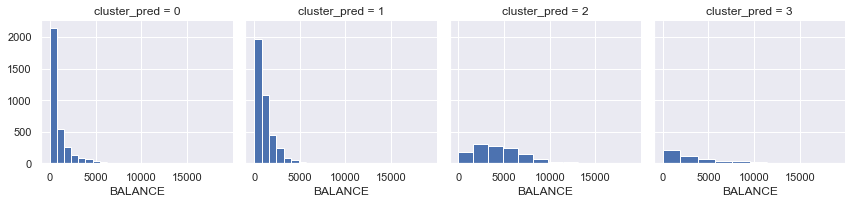

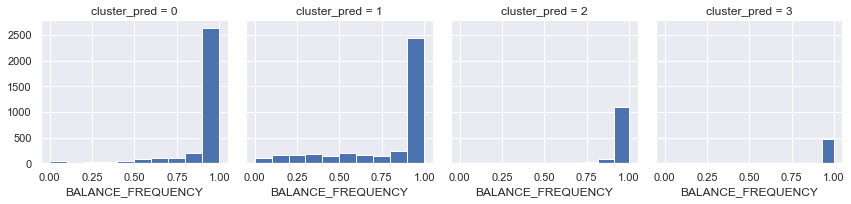

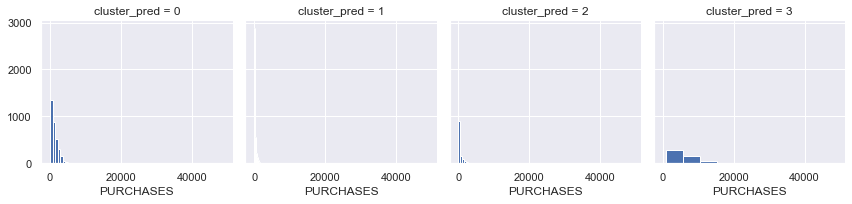

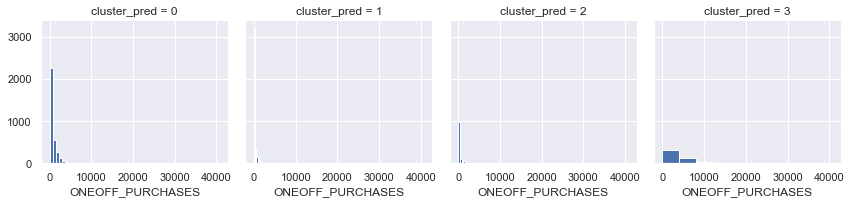

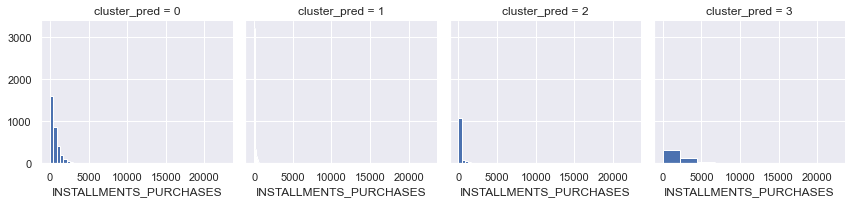

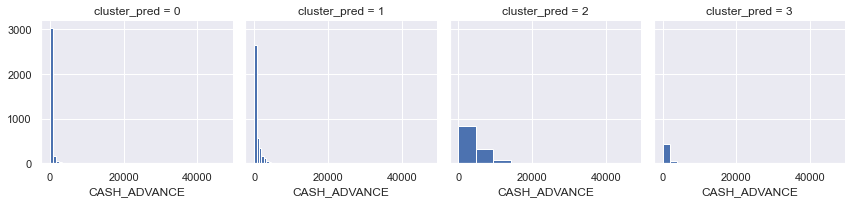

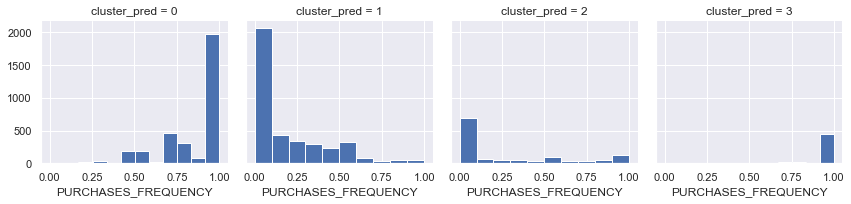

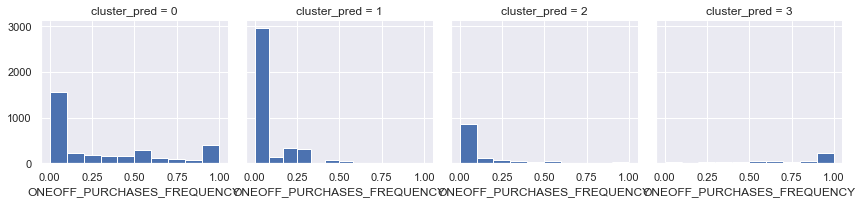

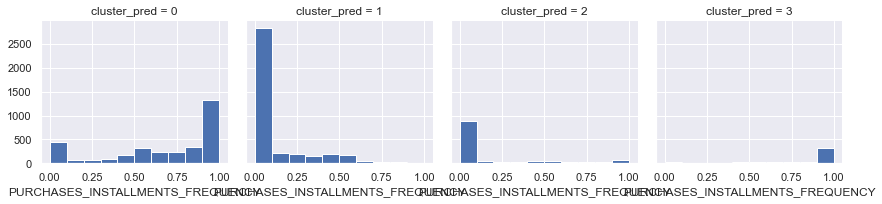

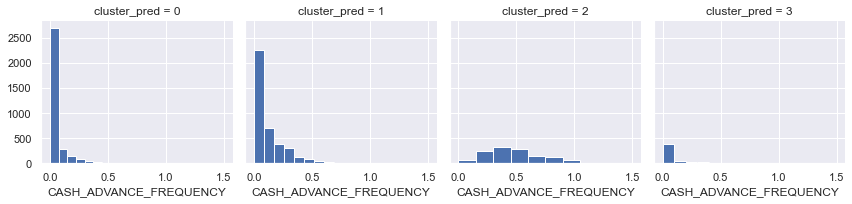

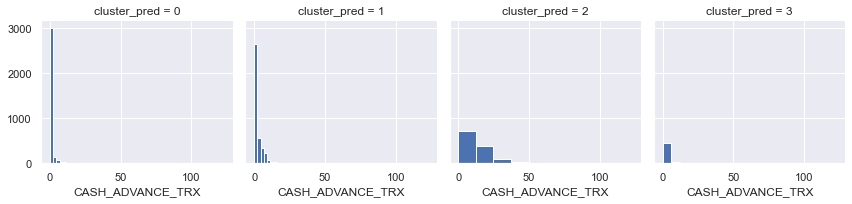

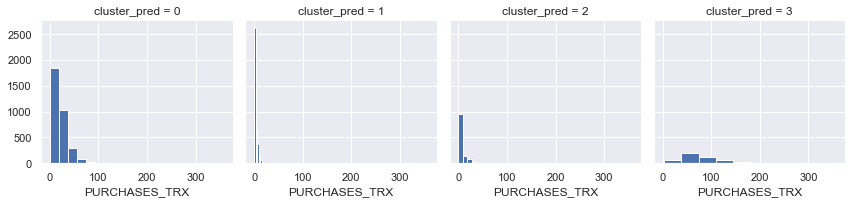

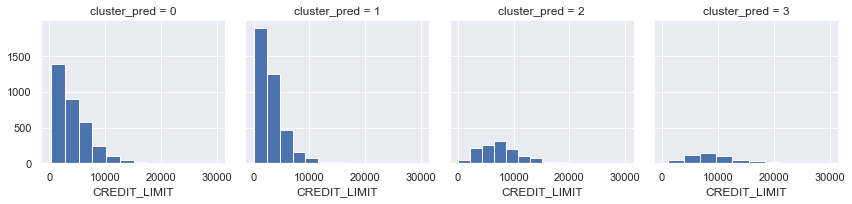

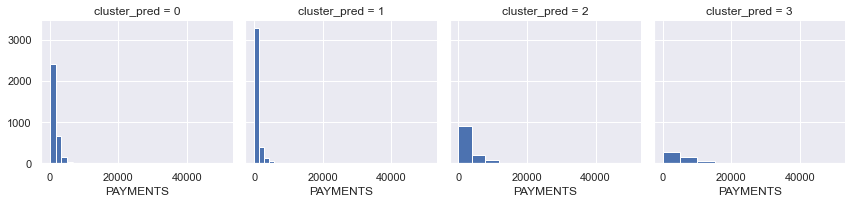

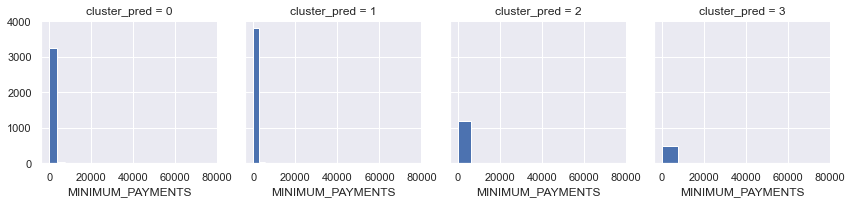

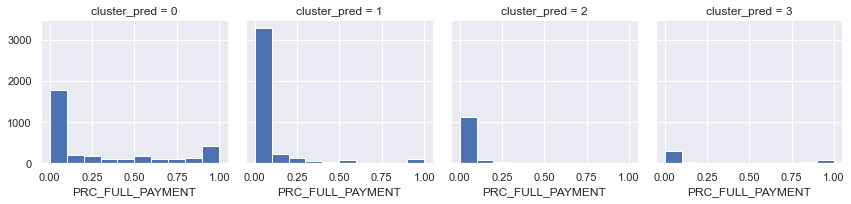

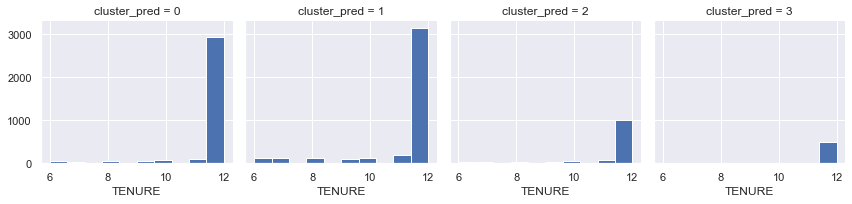

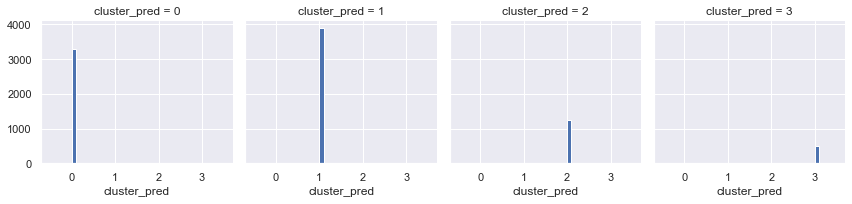

In [22]:
for c in clusters_new:
    grid= sns.FacetGrid(clusters_new, col='cluster_pred')
    grid.map(plt.hist, c)

Cluster0 People with average to high credit limit who take advance cash more often but don't make as many purchases

Cluster1 Less money spenders with low to average credit limits who purchases mostly in installments

Cluster2 This group uses their credit cards for one off purchases, they mostly have average to high credit limits

Cluster3 People with low to average credit limit who use their credits frequently for all types of purchases and cash advance

Clusters 3 is the biggest followed by cluster 1.